## Titanic Survival Prediction using Machine Learning

🔹 Implements complete ML pipeline: data cleaning, feature engineering, model training
🔹 Algorithms: Logistic Regression, Decision Trees, Random Forest
🔹 Key features: Pclass, Sex, Age, SibSp, Parch, Fare, Embarked
🔹 Achieves competitive accuracy through careful data preprocessing

#titanic #machinelearning #randomforest #logisticregression #decsisiontrees #classification

## Load Training and Testing Data

In [1]:
# importing important libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

# Load training and test data
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

# Quick look at data
print(train_df.head(5))
print(test_df.head(5))



FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/titanic/train.csv'

## Data Cleaning & Preprocessing

In [ ]:

#Finding columns that have null values
print("Columns with Null values")
print(train_df.isnull().sum())

#Drop useless columns
print(train_df.columns)
train_df = train_df.drop(['Name', 'Ticket', 'Cabin'], axis=1,errors='ignore')
print(train_df.head(5))

#Handle Missing Values
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
print("\nOriginal Training Data:")
print(train_df.head())

#Encode Categorical Columns
le_sex = LabelEncoder()
train_df['Sex'] = le_sex.fit_transform(train_df['Sex'])

le_embarked = LabelEncoder()
train_df['Embarked'] = le_embarked.fit_transform(train_df['Embarked'])
print("\nEncoded Data of Training Dataset")
print(train_df.head())



## Feature Selection

In [ ]:

X = train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y=train_df['Survived']

# Standard scaling
scaler = StandardScaler() 
x_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)
print(train_df.head())

## Model Logistic Regression Predictions

In [ ]:
# ----- Logistic Regression (requires scaling) -----
model=LogisticRegression()
model.fit(X_train,y_train)
regression_predict=model.predict(X_test)
print("\n Model Logistic Regression Predictions On who survived/not survived on Titanic ")
print(regression_predict)

## Decision Tree Predictions

In [ ]:
# ----- Decision Tree (no scaling needed) -----
X_train_dt, X_test_dt, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_model=DecisionTreeClassifier(random_state=1)
dt_model.fit(X_train,y_train)
dt_model_predict=dt_model.predict(X_test)
print("\n Model Decision Tree Predictions On who survived/not survived on Titanic ")
print(dt_model_predict)

## Random Forest Predictions

In [ ]:
# ----- Random Forest (no scaling needed) -----
X_train_rf, X_test_rf, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model=RandomForestClassifier(random_state=1)
rf_model.fit(X_train,y_train)
rf_model_predict=rf_model.predict(X_test)
print("\nRandom Forest Predictions On who survived/not survived on Titanic ")
print(rf_model_predict)

# Combine into a single DataFrame for clarity
predictions_df = pd.DataFrame({
    "Decsion Trees Pred": dt_model_predict,
    "Random Forest Pred": rf_model_predict,
    "Logistic Regression Pred": regression_predict
})

print("\nAll Predictions Together on Testing Data:")
print(predictions_df.head())


## Metrics Evaluation for 3 Models

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ----- Logistic Regression Metrics -----
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, regression_predict))
print("Precision:", precision_score(y_test, regression_predict))
print("Recall:", recall_score(y_test, regression_predict))
print("F1-score:", f1_score(y_test, regression_predict))

# ----- Decision Tree Metrics -----
print("\n=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, dt_model_predict))
print("Precision:", precision_score(y_test, dt_model_predict))
print("Recall:", recall_score(y_test, dt_model_predict))
print("F1-score:", f1_score(y_test, dt_model_predict))

# ----- Random Forest Metrics -----
print("\n=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, rf_model_predict))
print("Precision:", precision_score(y_test, rf_model_predict))
print("Recall:", recall_score(y_test, rf_model_predict))
print("F1-score:", f1_score(y_test, rf_model_predict))

## Training on Full Dataset

In [ ]:
# ----- Logistic Regression (requires scaling) -----
model=LogisticRegression(max_iter=1000)
model.fit(X,y)
regression_predict=model.predict(X)
print("\n Model Logistic Regression Predictions On who survived/not survived on Titanic ")
print(regression_predict)

# ----- Decision Tree (no scaling needed) -----

dt_model=DecisionTreeClassifier(random_state=1)
dt_model.fit(X,y)
dt_model_predict=dt_model.predict(X)
print("\n Model Decision Tree Predictions On who survived/not survived on Titanic ")
print(dt_model_predict)

# ----- Random Forest (no scaling needed) -----

rf_model=RandomForestClassifier(random_state=1)
rf_model.fit(X,y)
rf_model_predict=rf_model.predict(X)
print("\nRandom Forest Predictions On who survived/not survived on Titanic ")
print(rf_model_predict)

# Combine into a single DataFrame for clarity
predictions_df = pd.DataFrame({
    "Decsion Trees Pred": dt_model_predict,
    "Random Forest Pred": rf_model_predict,
    "Logistic Regression Pred": regression_predict
})

print("\nAll Predictions Together on Testing Data:")
print(predictions_df.head())

## Predictions on Test Data

In [ ]:
# --- 1. Drop unnecessary columns from test data ---
test_df = test_df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, errors='ignore')

# --- 2. Check and fill missing values ---
print("Missing values before filling:")
print(test_df.isnull().sum())

test_df['Age'] = test_df['Age'].fillna(train_df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())
test_df['Embarked'] = test_df['Embarked'].fillna('S')
test_df['Sex'] = test_df['Sex'].fillna('male')
print("\nOriginal Test Data")
print(test_df.head())

# --- 3. Convert to numeric manually ---
test_df['Sex'] = test_df['Sex'].apply(lambda x: 0 if x == 'male' else 1)
test_df['Embarked'] = test_df['Embarked'].apply(lambda x: 0 if x == 'S' else (1 if x == 'C' else 2))

# --- 4. Ensure all data is numeric ---
test_df = test_df.astype(float)
print("\nPreprocessed & Encoded Test Data:")
print(test_df.head())

# --- 5. Predict with trained models ---
dt_pred = dt_model.predict(test_df)
rf_pred = rf_model.predict(test_df)
lr_pred = model.predict(test_df)

# --- 6. Show predictions ---
predictions_df = pd.DataFrame({
    "Decision Tree Pred": dt_pred,
    "Random Forest Pred": rf_pred, 
    "Logistic Regression Pred": lr_pred
})

print("\nAll Predictions on Testing Data:")
print(predictions_df.head())

## VISUALIZATIONS 

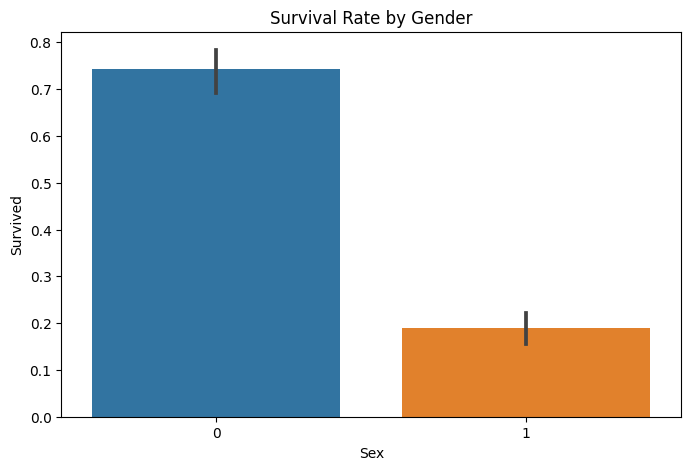

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Survival rate by gender
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Gender')
plt.show()

In [ ]:


# Load the original test data again to get PassengerId
test_data_original = pd.read_csv('/kaggle/input/titanic/test.csv')

# Create submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test_data_original['PassengerId'],
    'Survived': rf_pred  # Using Random Forest predictions
})

# Save to CSV file
submission.to_csv('submission.csv', index=False)

print("Submission file created successfully!")
print(f"File saved as: submission.csv")
print(f"Number of predictions: {len(submission)}")
print("\nFirst few rows of submission file:")
print(submission.head())